In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()
#no null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.info()
#4 float columns and 1 string column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].unique()
df['species'] = df['species'].str[5:]

In [6]:
lenght = []
for x in df.columns:
    if x != 'species':
        lenght.append(x)
    else:
        break

In [7]:
lenght

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

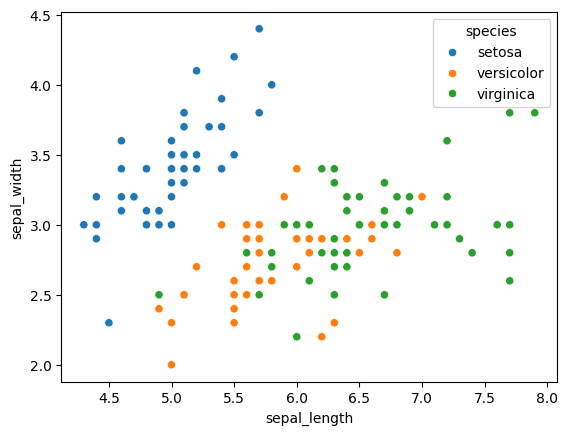

In [8]:
sns.scatterplot(data=df, x=lenght[0] , y=lenght[1], hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

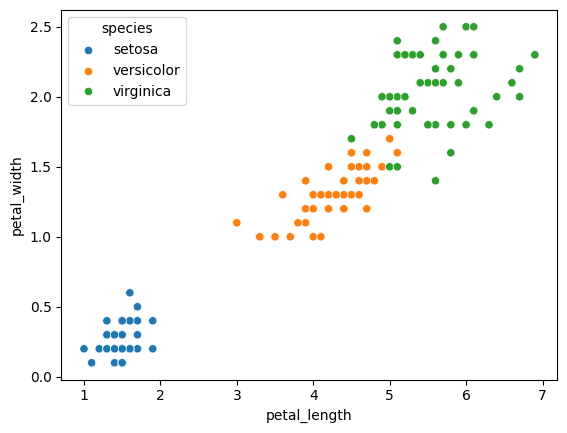

In [9]:
sns.scatterplot(data=df, x=lenght[2] , y=lenght[3], hue='species')

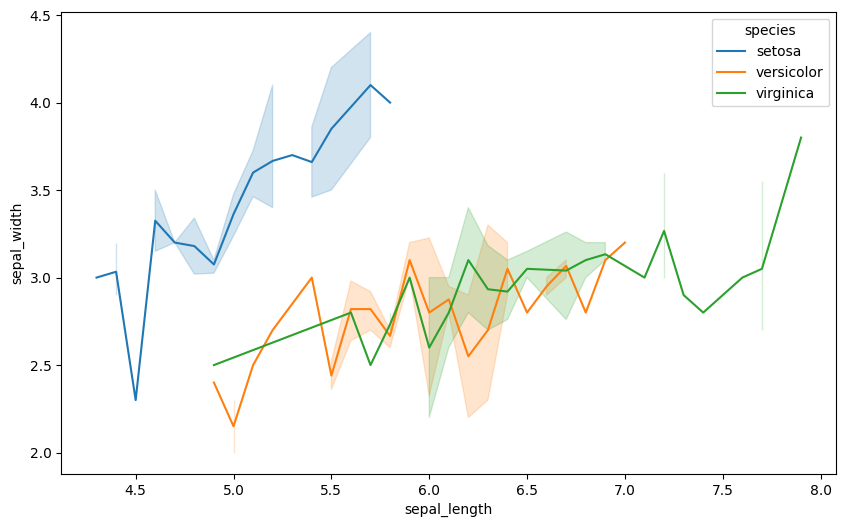

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=lenght[0] , y=lenght[1], hue='species')
plt.show()

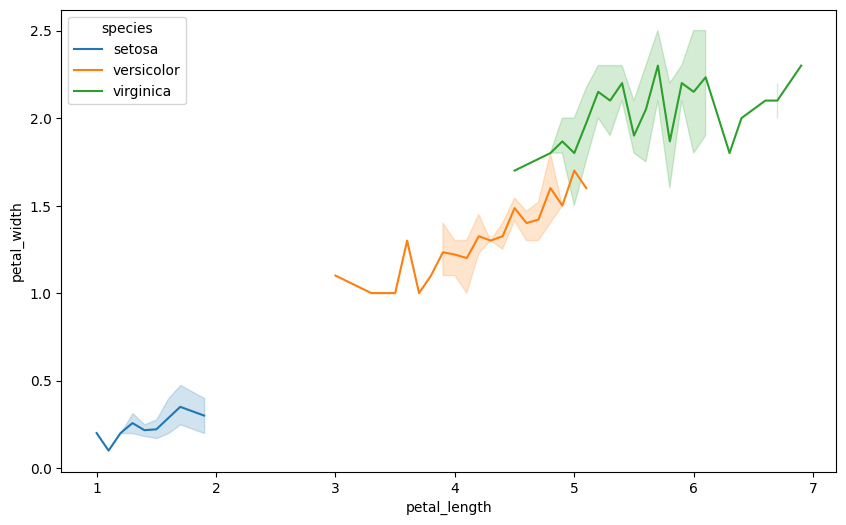

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=lenght[2] , y=lenght[3], hue='species')
plt.show()
#petal_length, petal_width
#is the best features we could use

In [12]:
species = list(df['species'].unique())
species

['setosa', 'versicolor', 'virginica']

In [13]:
df['species'].replace({species[0] : 0, species[1]:1, species[2]:2}, inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
y= df['species']
X = df[['petal_length', 'petal_width']]

In [15]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
log.score(X_test, y_test)

0.9666666666666667

In [17]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [18]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         9\n           1       1.00      0.93      0.97        15\n           2       0.86      1.00      0.92         6\n\n    accuracy                           0.97        30\n   macro avg       0.95      0.98      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

In [19]:
confusion_matrix(y_test, y_pred)

array([[ 9,  0,  0],
       [ 0, 14,  1],
       [ 0,  0,  6]], dtype=int64)